In [4]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define nodes (classes, datatype properties, object properties, and individuals)
classes = [
    "TestJob", "TestedMaterial", "Material", "TestingParameter", "SpecifiedTemperature",
    "TypeOfLoading", "InitialStress", "TestStandard", "DescriptionOfManufacturingProcess", "Quality"
]
data_properties = [
    "dateOfTestStart", "dateOfTestEnd", "testID", "testStandardApplied", "testStandard", "hasUnit",
    "hasSpecifiedNumericValue", "hasDescription", "digitalMaterialIdentifier"
]
object_properties = ["typeOfLoading"]
individuals = [
    "CMSX-6", "Compression", "Bending", "Tension", "TestJob"
]

# Add nodes to the graph
for cls in classes:
    G.add_node(cls, type="Class")
for dp in data_properties:
    G.add_node(dp, type="DatatypeProperty")
for op in object_properties:
    G.add_node(op, type="ObjectProperty")
for ind in individuals:
    G.add_node(ind, type="Individual")

# Define edges (subclass relationships, domain/range constraints, and property assertions)
edges = [
    ("TestedMaterial", "Material", "subClassOf"),
    ("TypeOfLoading", "TestingParameter", "subClassOf"),
    ("InitialStress", "TestingParameter", "subClassOf"),
    ("dateOfTestStart", "TestJob", "domain"),
    ("dateOfTestStart", "xsd:dateTime", "range"),
    ("dateOfTestEnd", "TestJob", "domain"),
    ("dateOfTestEnd", "xsd:dateTime", "range"),
    ("testID", "TestJob", "domain"),
    ("testID", "xsd:string", "range"),
    ("testStandardApplied", "TestStandard", "domain"),
    ("testStandardApplied", "xsd:boolean", "range"),
    ("testStandard", "TestStandard", "domain"),
    ("testStandard", "xsd:string", "range"),
    ("hasUnit", "Quality", "domain"),
    ("hasUnit", "xsd:string", "range"),
    ("hasSpecifiedNumericValue", "Quality", "domain"),
    ("hasSpecifiedNumericValue", "xsd:float", "range"),
    ("hasDescription", "DescriptionOfManufacturingProcess", "domain"),
    ("hasDescription", "xsd:string", "range"),
    ("digitalMaterialIdentifier", "TestedMaterial", "domain"),
    ("digitalMaterialIdentifier", "xsd:string", "range"),
    ("typeOfLoading", "TestJob", "domain"),
    ("typeOfLoading", "TypeOfLoading", "range"),
    ("TestJob", "Tension", "typeOfLoading"),
    ("TestStandard", "testStandardApplied", "hasValue"),
    ("TestStandard", "testStandard", "hasValue"),
    ("InitialStress", "Quality", "type"),
    ("InitialStress", "hasSpecifiedNumericValue", "hasValue"),
    ("InitialStress", "hasUnit", "hasValue"),
    ("CMSX-6", "TestedMaterial", "type"),
    ("CMSX-6", "digitalMaterialIdentifier", "hasValue"),
    ("SpecifiedTemperature", "Quality", "type"),
    ("SpecifiedTemperature", "hasSpecifiedNumericValue", "hasValue"),
    ("SpecifiedTemperature", "hasUnit", "hasValue"),
    ("DescriptionOfManufacturingProcess", "hasDescription", "hasValue"),
    ("TestJob", "testID", "hasValue"),
    ("TestJob", "dateOfTestStart", "hasValue")
]

# Add edges to the graph
for src, tgt, label in edges:
    G.add_edge(src, tgt, label=label)

# Print the graph information
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")



Graph has 28 nodes and 37 edges.


In [2]:
!pip install networkx

  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)


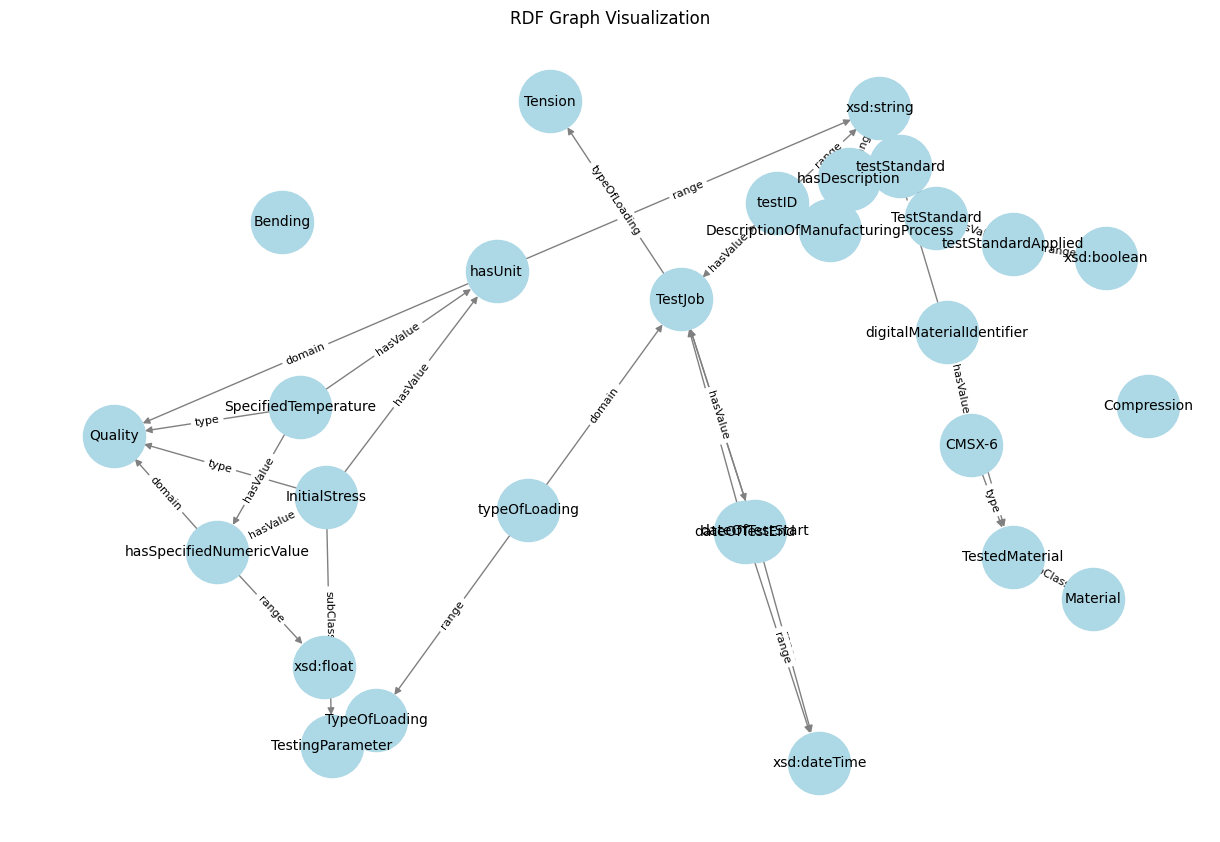

In [6]:
import matplotlib.pyplot as plt
# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(src, tgt): lbl for src, tgt, lbl in edges}, font_size=8)
plt.title("RDF Graph Visualization")
plt.show()


In [7]:
import rdflib
import networkx as nx

# Load the Turtle RDF file using rdflib
graph = rdflib.Graph()
graph.parse('graph.ttl', format='turtle')

# Create a new networkx graph
nx_graph = nx.DiGraph()  # Directed graph, can also use Graph() for undirected

# Iterate over the RDF triples and add them to the networkx graph
for subj, pred, obj in graph:
    # Convert RDF nodes to strings
    subj = str(subj)
    pred = str(pred)
    obj = str(obj)
    
    # Add edges to the networkx graph
    nx_graph.add_edge(subj, obj, predicate=pred)

# Now you can use nx_graph for further analysis or visualization
print(nx_graph.edges(data=True))


[('http://example.org/testStandardApplied', 'http://www.w3.org/2001/XMLSchema#boolean', {'predicate': 'http://www.w3.org/2000/01/rdf-schema#range'}), ('http://example.org/testStandardApplied', 'http://example.org/TestStandard', {'predicate': 'http://www.w3.org/2000/01/rdf-schema#domain'}), ('http://example.org/testStandardApplied', 'http://www.w3.org/2002/07/owl#DatatypeProperty', {'predicate': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'}), ('http://example.org/SpecifiedTemperature', 'http://www.w3.org/2002/07/owl#Class', {'predicate': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'}), ('http://example.org/SpecifiedTemperature', '980.0', {'predicate': 'http://example.org/hasSpecifiedNumericValue'}), ('http://example.org/SpecifiedTemperature', '°C', {'predicate': 'http://example.org/hasUnit'}), ('http://example.org/SpecifiedTemperature', 'http://example.org/Quality', {'predicate': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'}), ('http://example.org/TestStandard', 'http://ww

In [8]:
# Print the nodes and edges of the networkx graph
print("Nodes in the graph:", nx_graph.nodes())
print("Edges in the graph:", nx_graph.edges(data=True))

Nodes in the graph: ['http://example.org/testStandardApplied', 'http://www.w3.org/2001/XMLSchema#boolean', 'http://example.org/SpecifiedTemperature', 'http://www.w3.org/2002/07/owl#Class', 'http://example.org/TestStandard', 'http://example.org/typeOfLoading', 'http://www.w3.org/2002/07/owl#ObjectProperty', '980.0', 'http://example.org/CMSX-6', 'http://example.org/TestedMaterial', 'http://example.org/Bending', 'http://example.org/TypeOfLoading', 'http://example.org/hasSpecifiedNumericValue', 'http://www.w3.org/2002/07/owl#DatatypeProperty', 'http://example.org/dateOfTestEnd', 'http://example.org/Quality', 'http://example.org/hasDescription', 'http://example.org/DescriptionOfManufacturingProcess', 'http://example.org/dateOfTestStart', 'http://www.w3.org/2001/XMLSchema#dateTime', 'http://example.org/digitalMaterialIdentifier', 'http://example.org/TestJob', 'http://example.org/Tension', 'http://example.org/Material', 'http://example.org/InitialStress', 'DIN EN ISO 204:2019-4', 'MPa', 'http

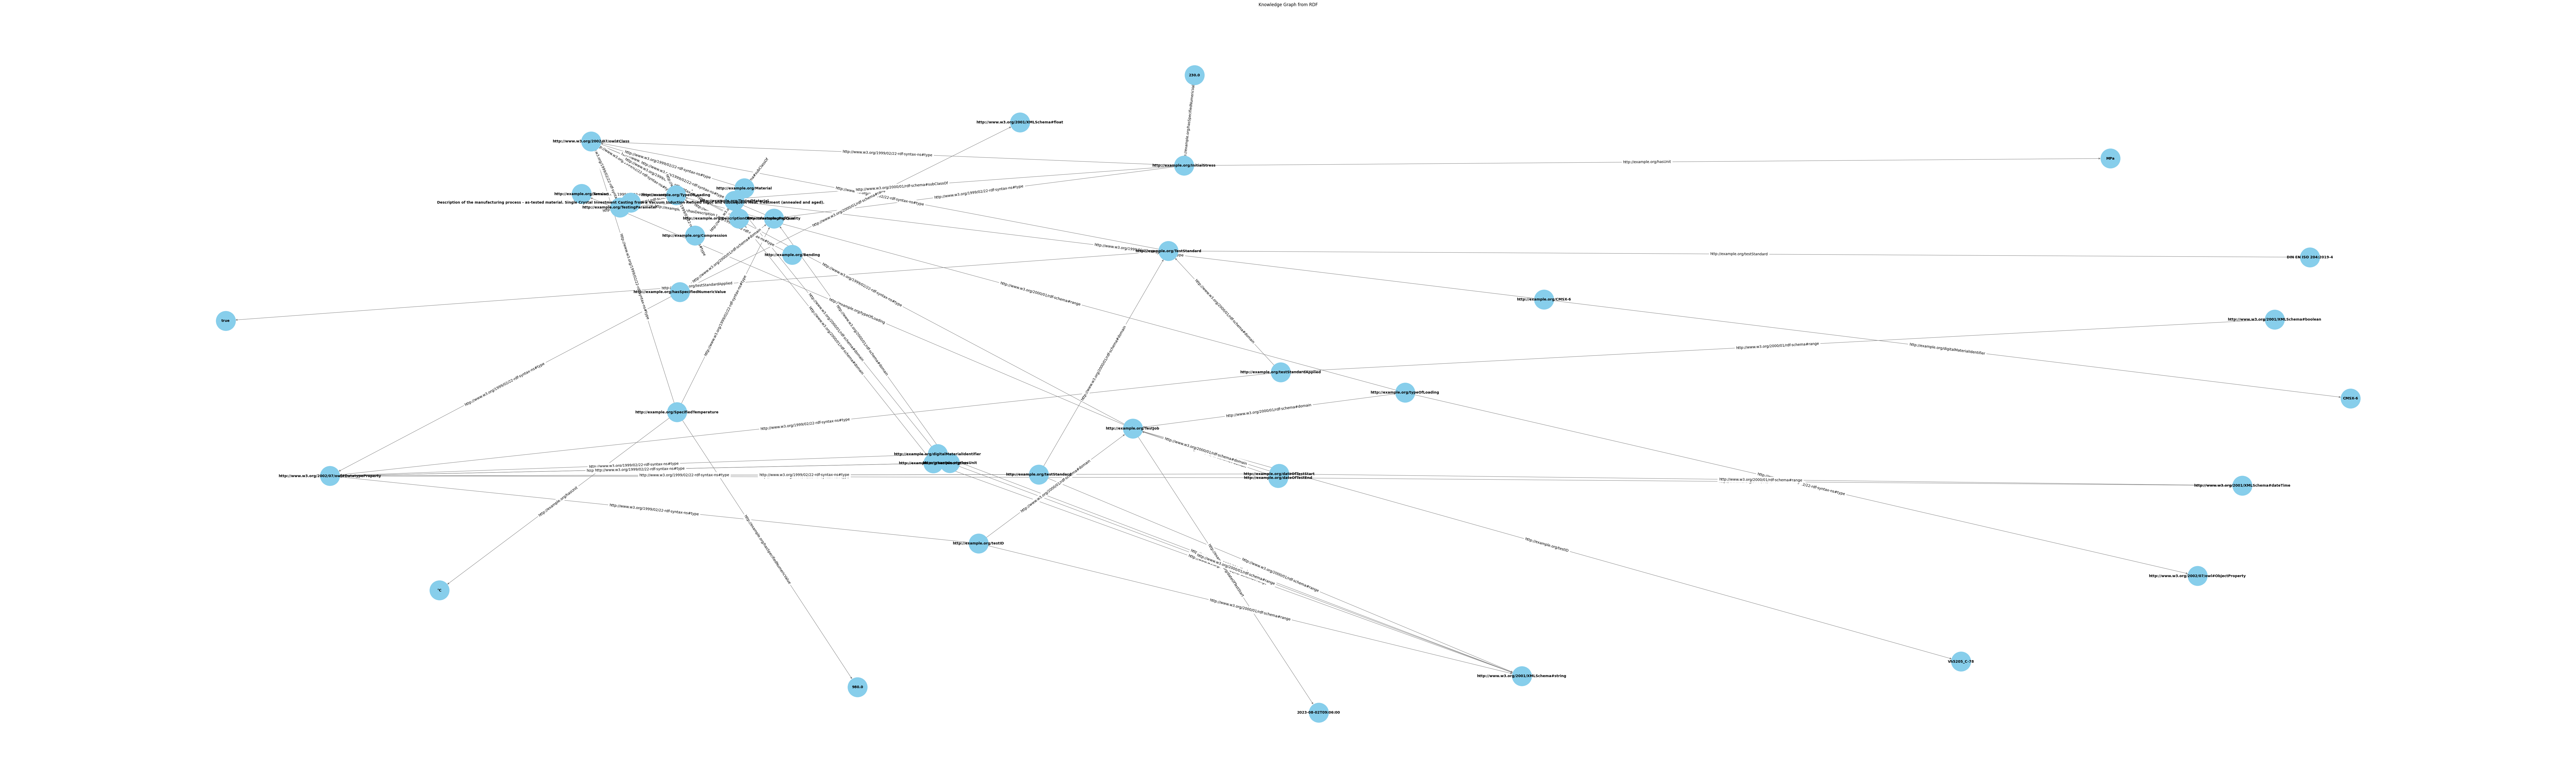

In [12]:
import rdflib
import networkx as nx
import matplotlib.pyplot as plt

# Load the Turtle RDF file using rdflib
graph = rdflib.Graph()
graph.parse('graph.ttl', format='turtle')

# Create a new networkx graph
nx_graph = nx.DiGraph()  # Directed graph

# Iterate over the RDF triples and add them to the networkx graph
for subj, pred, obj in graph:
    subj = str(subj)  # Convert RDF subject to string (node)
    pred = str(pred)  # Convert RDF predicate to string (edge attribute)
    obj = str(obj)    # Convert RDF object to string (node)
    
    # Add nodes and edge to the graph
    nx_graph.add_edge(subj, obj, predicate=pred)

# Plot the networkx graph
plt.figure(figsize=(100, 30))
pos = nx.spring_layout(nx_graph, seed=42)  # Layout for positioning the nodes

# Draw the graph
nx.draw(nx_graph, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")

# Label the edges with predicates
edge_labels = nx.get_edge_attributes(nx_graph, 'predicate')
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels)

# Display the plot
plt.title("Knowledge Graph from RDF")
plt.show()
